<a href="https://colab.research.google.com/github/alexascruz/repositorio-inicial/blob/main/GestaoLivros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insira o título do novo livro a ser cadastrado: Livro1
Qual é o autor desse novo livro? Autor1
Qual é o gênero do livro? Genero1
Qual a quantidade inicial disponível? 7
Livro cadastrado com sucesso! Deseja cadastrar outro livro? (s/n) s
Insira o título do novo livro a ser cadastrado: Livro2
Qual é o autor desse novo livro? Autor2
Qual é o gênero do livro? Genero2
Qual a quantidade inicial disponível? 4
Livro cadastrado com sucesso! Deseja cadastrar outro livro? (s/n) n
Livro1 Autor1 Genero1 7
Livro2 Autor2 Genero2 4
Qual livro você gostaria de buscar? Livro1
livro: Livro1 na quantidade: 7


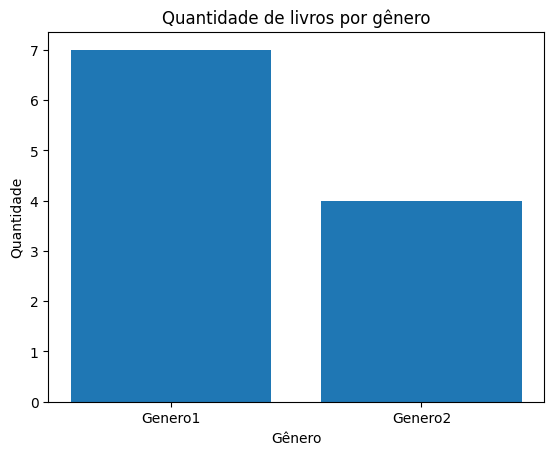

In [5]:
#Sistema de gestão de livros
import matplotlib.pyplot as plt
import sqlite3

#Criando banco de dados e criando tabelas
def Banco():
  banco = sqlite3.connect('banco.db')
  cursor = banco.cursor()

  create_tbllivros = """
      CREATE TABLE IF NOT EXISTS TBLLIV (
      ID INTEGER PRIMARY KEY,
      NOMETITULO TEXT,
      NOMEAUTOR TEXT,
      GENERO TEXT,
      QUANTIDADE INTEGER);
"""

  cursor.execute(create_tbllivros)
  banco.commit()
  banco.close()


#1° Passo: Definição da classe livro
class cLivros:
  def __init__ (self, titulo, autor, genero, quantidade):
    self.titulo = titulo
    self.autor = autor
    self.genero = genero
    self.quantidade = quantidade

#2° Passo: Inicialização de lista vazia, para armazenar os livros que serão cadastrados
lista_Livros = []

#3° Passo: Funções para gerenciar os livros (cadastro, listar todos os livros e buscar um livro pelo titulo)
def CadastrarLivro ():
  titulo = input("Insira o título do novo livro a ser cadastrado: ")
  autor = input("Qual é o autor desse novo livro? ")
  genero = input("Qual é o gênero do livro? ")
  quantidade = int(input("Qual a quantidade inicial disponível? "))
  lv = cLivros(titulo, autor, genero, quantidade)
  if lv:
    lista_Livros.append(lv)
  else:
    print("Erro ao cadastrar livro")

def Cadastro():
  while True:
    CadastrarLivro()
    if input("Livro cadastrado com sucesso! Deseja cadastrar outro livro? (s/n) ") == "n":
      break

def ListarTodosLivros ():
  for elem_livro in lista_Livros:
    print(elem_livro.titulo, elem_livro.autor, elem_livro.genero, elem_livro.quantidade)

def BuscarLivro ():
  busca = input("Qual livro você gostaria de buscar? ")
  for elem_livro in lista_Livros:
    if elem_livro.titulo == busca:
      # print(elem_livro.titulo, elem_livro.autor, elem_livro.genero, elem_livro.quantidade)
      return elem_livro
    else:
      print("Livro não encontrado!")

#Salvando os dados do livro cadastrado no banco
def SalvarLivroBanco():
  banco = sqlite3.connect('banco.db')
  cursor = banco.cursor()
  for elem_livro in lista_Livros:
    cursor.execute("INSERT INTO TBLLIV (NOMETITULO, NOMEAUTOR, GENERO, QUANTIDADE) VALUES (?,?,?,?)",(elem_livro.titulo, elem_livro.autor, elem_livro.genero, elem_livro.quantidade))
  banco.commit()
  banco.close()

#Geração de gráfico
def GerarGrafico():
  eixox = []
  eixoy = []
  for elem_livro in lista_Livros:
    eixox.append(elem_livro.genero)
    eixoy.append(elem_livro.quantidade)

  plt.bar(eixox, eixoy)
  plt.title("Quantidade de livros por gênero")
  plt.xlabel("Gênero")
  plt.ylabel("Quantidade")
  plt.show()


Banco()
Cadastro()
ListarTodosLivros()
livro_buscado = BuscarLivro()
print(f'livro: {livro_buscado.titulo} na quantidade: {livro_buscado.quantidade}')
SalvarLivroBanco()
GerarGrafico()

In [7]:
banco= sqlite3.connect('banco.db')
cursor = banco.cursor()
cursor.execute("SELECT * FROM TBLLIV")
print(cursor.fetchall())

[(1, 'Livro1', 'Autor1', 'Genero1', 7), (2, 'Livro2', 'Autor2', 'Genero2', 4)]
